<a href="https://colab.research.google.com/github/ferdouszislam/Weather-WaterLevel-Prediction-ML/blob/main/Notebooks/brri-dataset/experimentations/xgboost_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # the imports in this cell are required when running on local device
# import os, sys
# sys.path.append(os.path.join('..', '..'))
# from utils.applyML_util import train_classification, eval_classification
# from utils.featureSelection_util import (pearson_correlation_fs, 
#                                          seleckKBest_fs, selectSequential_fs)

In [2]:
# the imports in this cell are required when running from Cloud (Colab/Kaggle)
# before running on cloud you nee to upload the .py files 
# from 'Notebooks/utils' directory
from applyML_util import train_classification, eval_classification, showEvalutationGraph_classification
from featureSelection_util import (pearson_correlation_fs, 
                                   seleckKBest_fs, selectSequential_fs)

**XGBoost Documentation link:** https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xgboost.sklearn import XGBClassifier

In [4]:
# global random seed
RAND_SEED = 42

# initial model with only random seed and not any hyper-parametes
initial_model = XGBClassifier(random_state=RAND_SEED)

# hyper-parameters
n_estimators = [x*3 for x in range(1, 31)]
tree_method = ['hist']
learning_rate = [0.001, 0.01, 0.1, 1.0]
subsample = [0.25, 0.5, 1.0]

# dictonary of all hyperparameters
param_grid = {
    'n_estimators': n_estimators,
    'tree_method': tree_method,
    'learning_rate': learning_rate,
    'subsample': subsample,
}

# variables needed for showEvalGraph_regression() function
MODEL_CLASS = XGBClassifier
class_label = 'Rainfall'
x_axis_param_name = 'n_estimators'
x_axis_param_vals = n_estimators

## 1. Experimentation on the Weather Daily Dataset

In [5]:
# Load the train dataset
weather_daily_train_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/train/brri-weather_train_classification.csv')

# Load the test set
weather_daily_test_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/test/brri-weather_test_classification.csv')

### 1.0 No technique

In [6]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_train_df, cls=class_label)
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

Selected hyperparameters: {'learning_rate': 1.0, 'n_estimators': 48, 'subsample': 1.0, 'tree_method': 'hist'}
Train set performance: accuracy=0.7705, macro-f1=0.5979


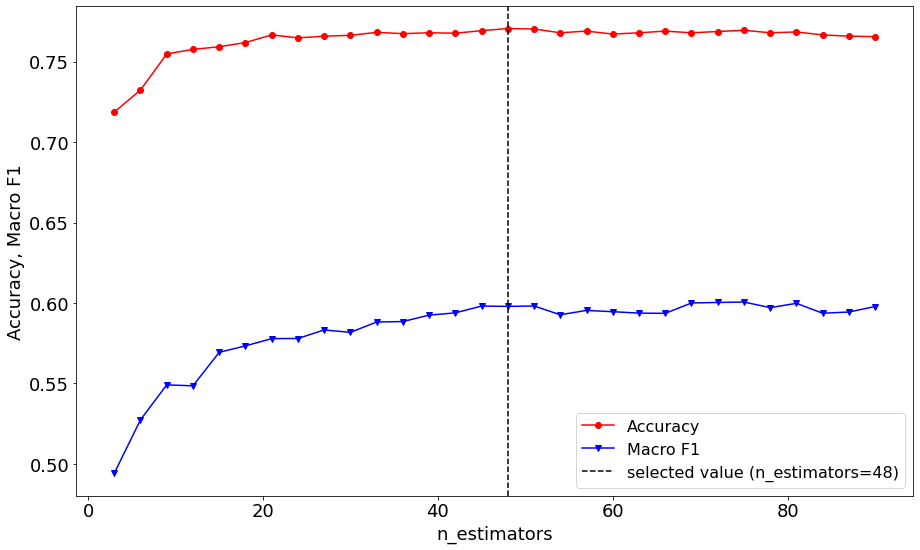

In [7]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_classification(MODEL_CLASS, weather_daily_train_df, cls=class_label, 
                                    x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                    selected_model_params=selected_model_params)

In [8]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7703, macro-f1=0.6023


### 1.1 Apply Pearson Feature Selection to Daily Weather Dataset

In [9]:
# select features from the train dataset
weather_daily_fs1_train_df, cols_to_drop = pearson_correlation_fs(weather_daily_train_df, class_label)

# keep only selected features on the test dataset
weather_daily_fs1_test_df = weather_daily_test_df.drop(columns=cols_to_drop)

dropping Sunshine (hour/day) from (Cloudy (hour/day), Sunshine (hour/day))


In [10]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_fs1_train_df, cls=class_label)
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

Selected hyperparameters: {'learning_rate': 1.0, 'n_estimators': 60, 'subsample': 1.0, 'tree_method': 'hist'}
Train set performance: accuracy=0.7681, macro-f1=0.599


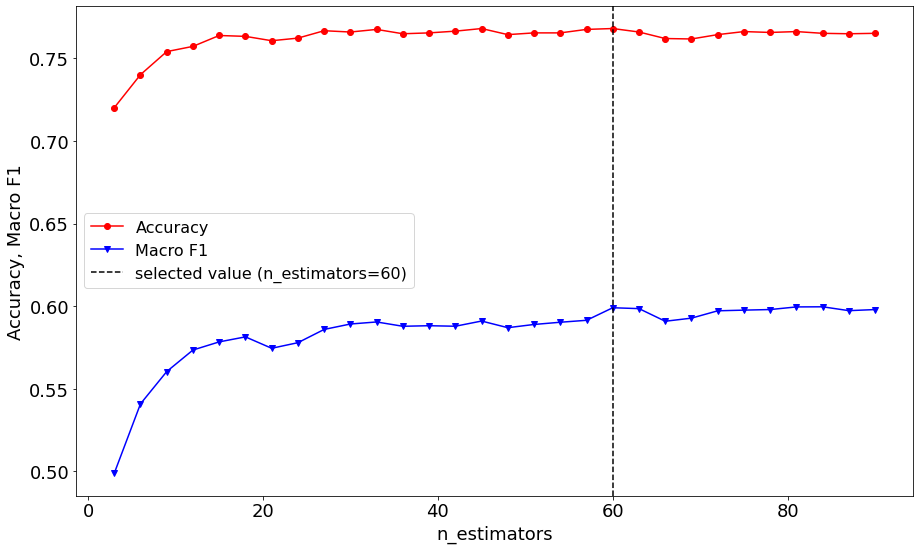

In [11]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_classification(MODEL_CLASS, weather_daily_fs1_train_df, cls=class_label, 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                selected_model_params=selected_model_params)

In [12]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_fs1_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7534, macro-f1=0.5815


### 1.2 Apply SelectKBest Feature Selection to Daily Weather Dataset

In [13]:
# select features from the train dataset
weather_daily_fs2_train_df, cols_to_drop = seleckKBest_fs(weather_daily_train_df, class_label, is_regression=True)

print('features dropped:', cols_to_drop)

# keep only selected features on the test dataset
weather_daily_fs2_test_df = weather_daily_test_df.drop(columns=cols_to_drop)

features dropped: ['Max Temp. (degree Celcius)', 'Relative Humidity (morning, %)']


In [14]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_fs2_train_df, cls=class_label)
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

Selected hyperparameters: {'learning_rate': 1.0, 'n_estimators': 15, 'subsample': 1.0, 'tree_method': 'hist'}
Train set performance: accuracy=0.7647, macro-f1=0.5853


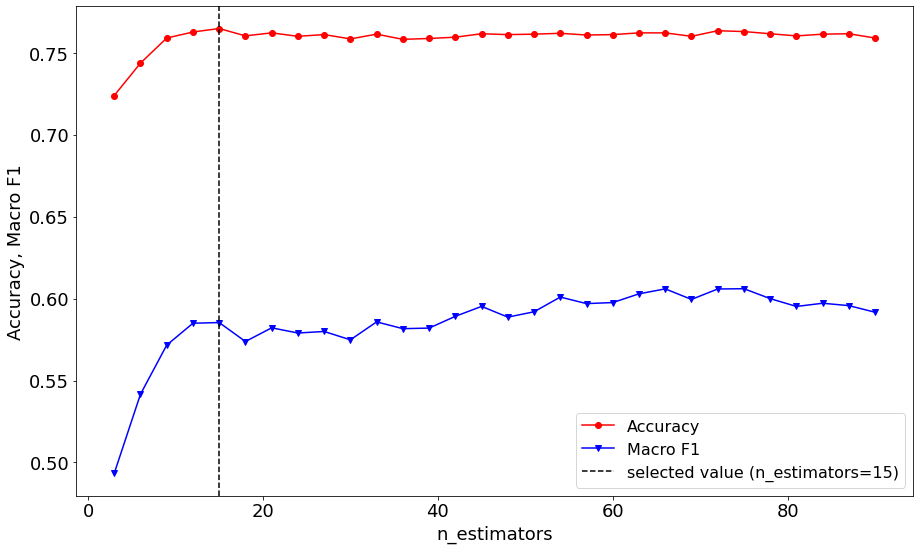

In [15]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_classification(MODEL_CLASS, weather_daily_fs2_train_df, cls=class_label, 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                selected_model_params=selected_model_params)

In [16]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_fs2_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7703, macro-f1=0.6013


### 1.3 SMOTE on Daily Dataset

In [17]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_train_df, 
                                                                             cls=class_label, sampling_technique='smote')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

class distribution before sampling: {1: 1008, 0: 2477, 2: 310}
class distribution after sampling: {1: 2477, 0: 2477, 2: 2477}
Selected hyperparameters: {'learning_rate': 1.0, 'n_estimators': 90, 'subsample': 1.0, 'tree_method': 'hist'}
Train set performance: accuracy=0.836, macro-f1=0.835


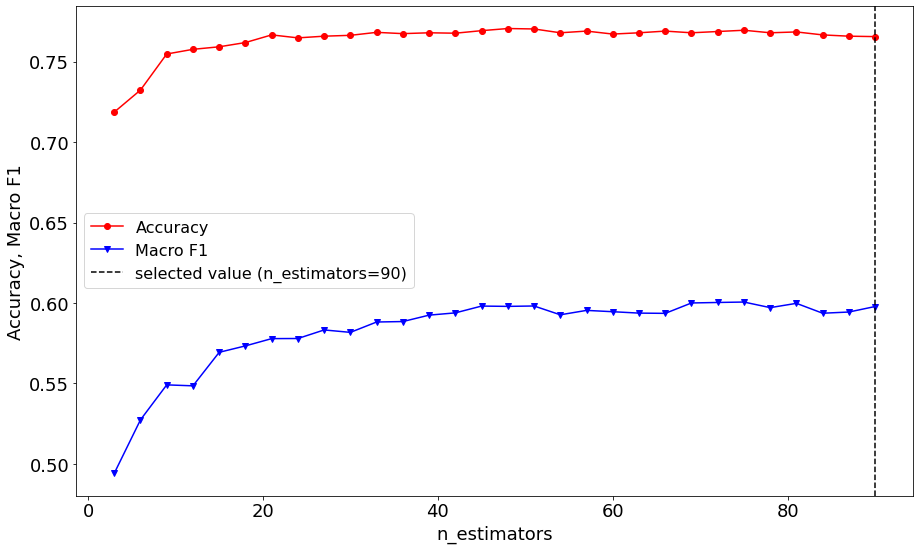

In [18]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_classification(MODEL_CLASS, weather_daily_train_df, cls=class_label, 
                                    x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                    selected_model_params=selected_model_params)

In [19]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7503, macro-f1=0.6046


### 1.4 Random Undersampling + SMOTE on Daily Dataset

In [20]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_train_df, 
                                                                             cls=class_label, sampling_technique='hybrid')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

class distribution before sampling: {1: 1008, 0: 2477, 2: 310}
class distribution after sampling: {0: 1981, 1: 1981, 2: 1981}
Selected hyperparameters: {'learning_rate': 1.0, 'n_estimators': 90, 'subsample': 1.0, 'tree_method': 'hist'}
Train set performance: accuracy=0.8233, macro-f1=0.8222


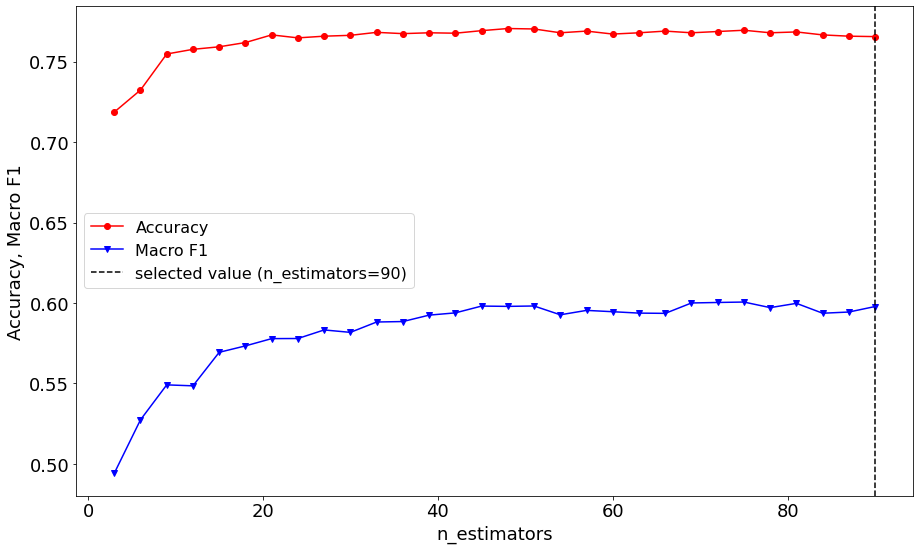

In [21]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_classification(MODEL_CLASS, weather_daily_train_df, cls=class_label, 
                                    x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                    selected_model_params=selected_model_params)

In [22]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7503, macro-f1=0.6078


### 1.5 Pearson Feature Selection + Hybrid Sampling to Daily Weather Dataset

In [23]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_fs1_train_df, 
                                                                             cls=class_label, sampling_technique='hybrid')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

class distribution before sampling: {1: 1008, 0: 2477, 2: 310}
class distribution after sampling: {0: 1981, 1: 1981, 2: 1981}
Selected hyperparameters: {'learning_rate': 1.0, 'n_estimators': 87, 'subsample': 1.0, 'tree_method': 'hist'}
Train set performance: accuracy=0.8227, macro-f1=0.8216


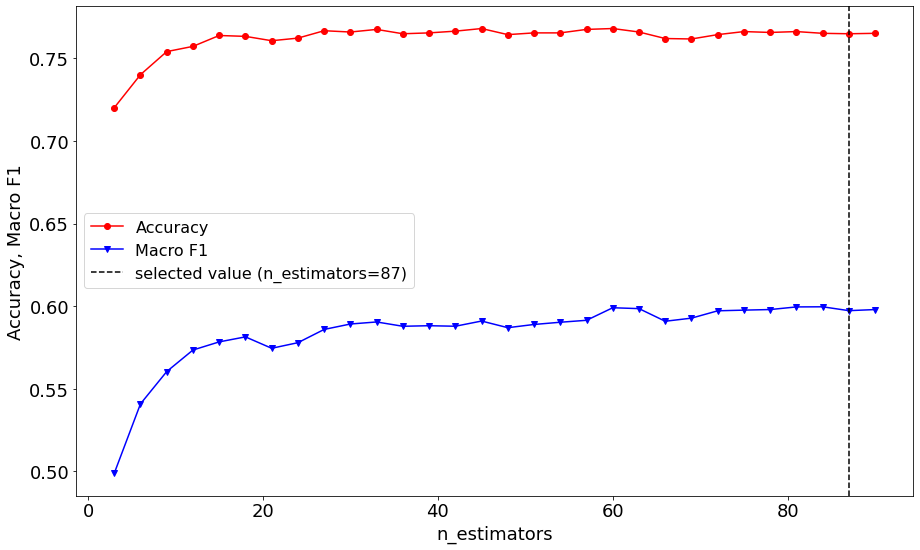

In [24]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_classification(MODEL_CLASS, weather_daily_fs1_train_df, cls=class_label, 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                selected_model_params=selected_model_params)

In [25]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_fs1_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7492, macro-f1=0.6074


### 1.6 SelecKBest Feature Selection + Hybrid Sampling to Daily Weather Dataset

In [26]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_fs2_train_df, 
                                                                             cls=class_label, sampling_technique='hybrid')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

class distribution before sampling: {1: 1008, 0: 2477, 2: 310}
class distribution after sampling: {0: 1981, 1: 1981, 2: 1981}
Selected hyperparameters: {'learning_rate': 1.0, 'n_estimators': 87, 'subsample': 1.0, 'tree_method': 'hist'}
Train set performance: accuracy=0.8038, macro-f1=0.8025


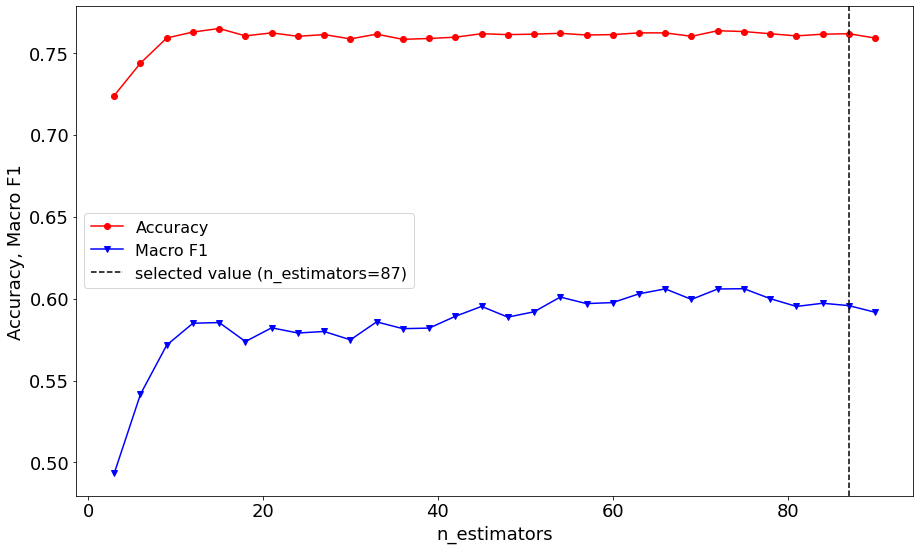

In [27]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams
selected_model_params['random_state'] = RAND_SEED

showEvalutationGraph_classification(MODEL_CLASS, weather_daily_fs2_train_df, cls=class_label, 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                selected_model_params=selected_model_params)

In [28]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_fs2_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7355, macro-f1=0.5997
